<a href="https://colab.research.google.com/github/akd6203/AI-optical-search-using-VGG16/blob/main/cat_dog_vgg16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.applications.vgg16 import VGG16
#from vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense,Activation,Flatten,Dropout
import os
import numpy as np
from keras.applications.vgg16 import VGG16
#from vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense,Activation,Flatten,Dropout
import os
import numpy as np
import cv2


import cv2
from keras.optimizers import *
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [3]:
input_shape = Input(shape=(224,224,3))

model = VGG16(input_tensor=input_shape,include_top=True,weights='imagenet')

553467096/553467096 [==============================] - 6s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(2, activation='softmax', name='output')(x)

custom_vgg_model2 = Model(input_shape, out)
custom_vgg_model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
for layer in custom_vgg_model2.layers[:-4]:
    layer.trainable = False

In [7]:
for layer in custom_vgg_model2.layers:
    print (layer.name,':',layer.trainable)

input_1 : False
block1_conv1 : False
block1_conv2 : False
block1_pool : False
block2_conv1 : False
block2_conv2 : False
block2_pool : False
block3_conv1 : False
block3_conv2 : False
block3_conv3 : False
block3_pool : False
block4_conv1 : False
block4_conv2 : False
block4_conv3 : False
block4_pool : False
block5_conv1 : False
block5_conv2 : False
block5_conv3 : False
block5_pool : False
flatten : True
fc1 : True
fc2 : True
output : True


In [8]:
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
img_width,img_height = 224,224

base_dir = '/content/drive/MyDrive/'
train_data_dir = base_dir+'cat_dog_1000/train/'
validation_data_dir = base_dir+'cat_dog_1000/valid'
train_samples = 2000
validation_samples=800
epochs=5
batch_size=16

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                  )

validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width,img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              )

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [14]:
custom_vgg_model2.fit_generator(train_generator,
                                steps_per_epoch=2000 // batch_size,
                                epochs=5,
                                validation_data=validation_generator,
                                validation_steps=800 // batch_size)

<ipython-input-14-0ad23333b4b2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  custom_vgg_model2.fit_generator(train_generator,


Epoch 1/5
125/125 [==============================] - 1488s 12s/step - loss: 0.4311 - accuracy: 0.8035 - val_loss: 0.3794 - val_accuracy: 0.8512
Epoch 2/5
125/125 [==============================] - 1509s 12s/step - loss: 0.3165 - accuracy: 0.8685 - val_loss: 0.2474 - val_accuracy: 0.8950
Epoch 3/5
125/125 [==============================] - 1501s 12s/step - loss: 0.2598 - accuracy: 0.8840 - val_loss: 0.2556 - val_accuracy: 0.8913
Epoch 4/5
125/125 [==============================] - 1520s 12s/step - loss: 0.2495 - accuracy: 0.8890 - val_loss: 0.3542 - val_accuracy: 0.8637
Epoch 5/5
125/125 [==============================] - 1502s 12s/step - loss: 0.2273 - accuracy: 0.9045 - val_loss: 0.2194 - val_accuracy: 0.9137


In [15]:
custom_vgg_model2.save('cat_dog_fine_tune_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from keras.models import load_model

In [17]:
new_model = load_model('cat_dog_fine_tune_model.h5')

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
test=cv2.imread(base_dir+'cat_dog_1000/test/cat.jpeg')

In [22]:
test.shape

(350, 527, 3)

In [23]:
test = cv2.resize(test,(224,224))

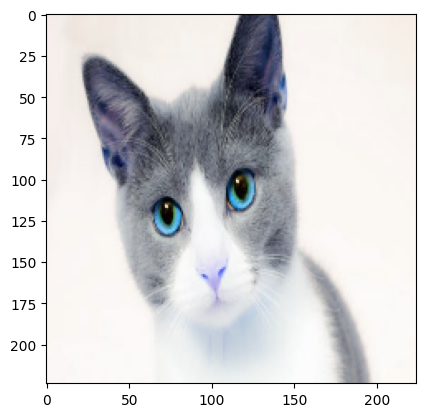

In [24]:
plt.imshow(test)

In [25]:
test = test.astype('float')/255

In [26]:
test = test.reshape(1,224,224,3)

In [27]:
classess = {0:'cat',1:'dog'}

In [ ]:
#p=custom_vgg_model2.predict(test).argmax()

In [ ]:
#classess[p]

In [ ]:
#custom_vgg_model2.predict(test)

In [28]:
p=new_model.predict(test).argmax()

1/1 [==============================] - 2s 2s/step


In [29]:
classess[p]

'cat'

In [30]:
new_model.predict(test).astype('float')

1/1 [==============================] - 1s 1s/step


array([[9.9992466e-01, 7.5297372e-05]])

In [31]:
new_model.predict(test)[0][0]

1/1 [==============================] - 0s 471ms/step


0.99992466